## Data Scientist Challenge - LATAM Airlines
### Instrucciones
En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en
un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo
que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el manejo adecuado de git. **Este desafío
deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar**. Lo que
buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el
tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio.

### Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL.

### Importando librerías

* **pandas**
* **os**
* **matplotlib**
* **numpy**
* **seaborn**

In [207]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'd:\\ProyectosVisualCode\\LATAM-Airlines'

### Lectura de datos


* **Low_memory**:  Procesa internamente el archivo en fragmentos, lo que da como resultado un menor uso de la memoria durante el análisis.

* **Header** :  Los Número(s) de fila se  utilizan  como nombres de columna, y el inicio de los datos, la header=0 y los nombres de columna se infieren de la primera línea del archivo.

* **Parse_dates**: Función que se usará para convertir una secuencia de columnas de cadena en una matriz de instancias de fecha y hora.

In [208]:
df = pd.read_csv('data/dataset_SCL.csv', low_memory=False, header=0, parse_dates=True)

### Descripción de Variables


* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

##### Análisis Exploratorio y distribución de los datos

En primera instancia, una vez que se lee el archivo .csv, se guarda en un dataframe llamado df y se verifica el despliegue de todas las variables

In [209]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


A continuación se verifica los los tipos de variables con los que contamos en la información proporcionada

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Verificamos con cuantos renglones y columnas tiene nuestro dataframe

In [211]:
df.shape

(68206, 18)

Así mismmo el nombre de las columnas que para nuestro análisis serán las variables

In [212]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

Se verifica los valores nulos y como resultado se ve que solo hay un valor nulo

In [213]:
df.isna().any()


Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

Se porcede a borrarlo

In [214]:
df.dropna()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


De esta manera, tenemos una data en principio limpia y lista para comenzar con el análisis exploratorio y ver como estan distribuidos nuestros datos en el dataframe

### Desafío

##### 1. ¿Cómo se distribuyen los datos? , ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

A continuación se realiza una análisis de distribución de los datos para la comprensión de los mismos, se utiliza la librería **seaborn**, para realizar la viuslaización, así mismo se enfatiza que no es la única librería pera realizarlo. Se tomarán algunas variables de importancia para comprender un poco más los datos

* **AÑO** : Año de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLADES** : Nombre ciudad destino.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **DIANOM** : Día de la semana de operación del vuelo.

**Nota**: Las variables pueden tomarse en el orden que se requiera para su análsis

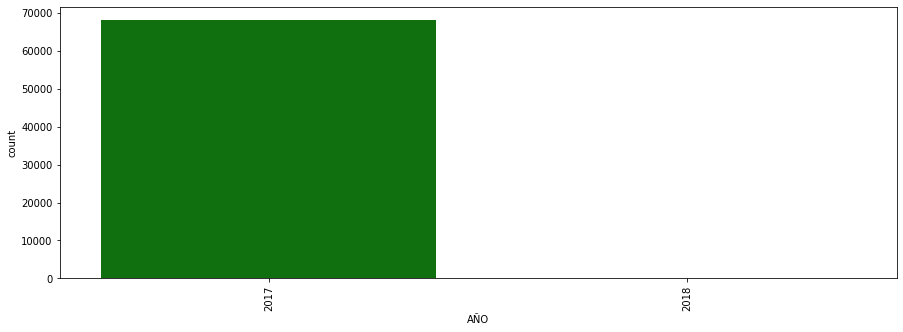

In [215]:
plt.figure(figsize=(15,5))
sns.countplot(x='AÑO', data=df, color = 'g')
plt.xticks(rotation=90)
plt.show()

In [216]:
df.AÑO.value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

En la figura y en el conteo anterior se observa que la cantidad de vuelos en el 2017 fueron mucho mayor que en el 2018, esto representa como un posible dato atípico, comparandolo con las cantidades que existen en ambos años

In [217]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


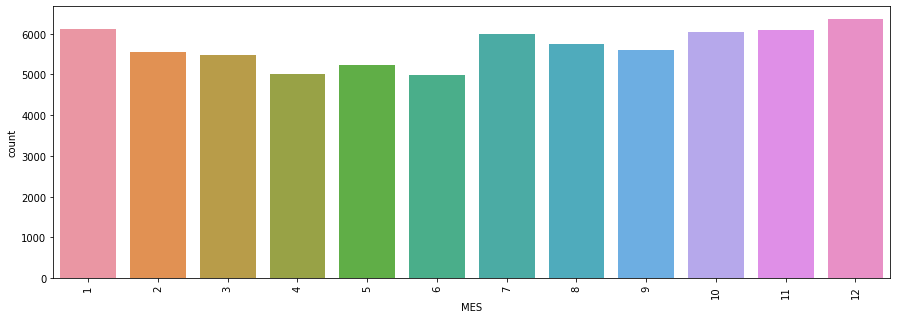

In [218]:
plt.figure(figsize=(15,5))
sns.countplot(x='MES', data=df)
plt.xticks(rotation=90)
plt.show()

In [219]:
df.MES.value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

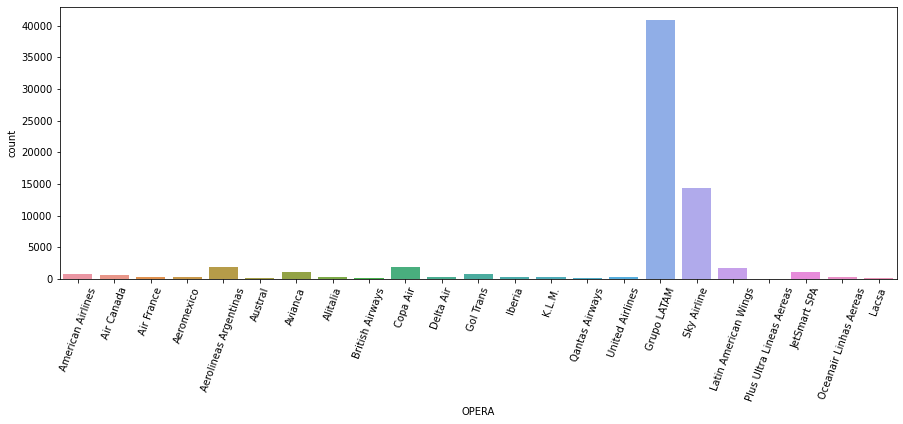

In [220]:
plt.figure(figsize=(15,5))
sns.countplot(x='OPERA',  data=df)
plt.xticks(rotation=70)
plt.show()

In [221]:
df['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

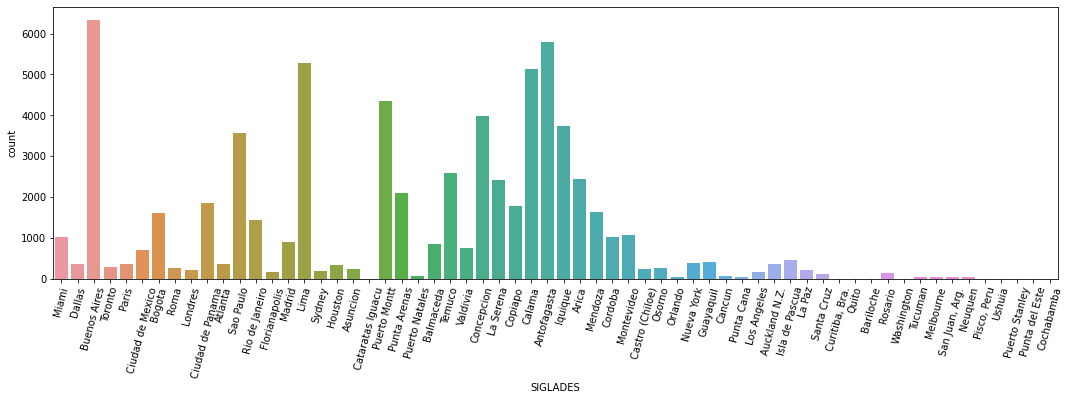

In [222]:
plt.figure(figsize=(18,5))
sns.countplot(x='SIGLADES', data=df)
plt.xticks(rotation=75)
plt.show()

In [223]:
df['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Pisco, Peru          1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64

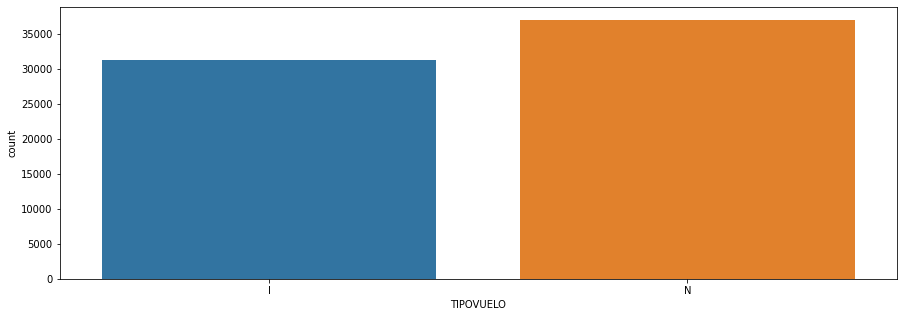

In [224]:
plt.figure(figsize=(15,5))
sns.countplot(x="TIPOVUELO", data=df)
plt.show()

In [225]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

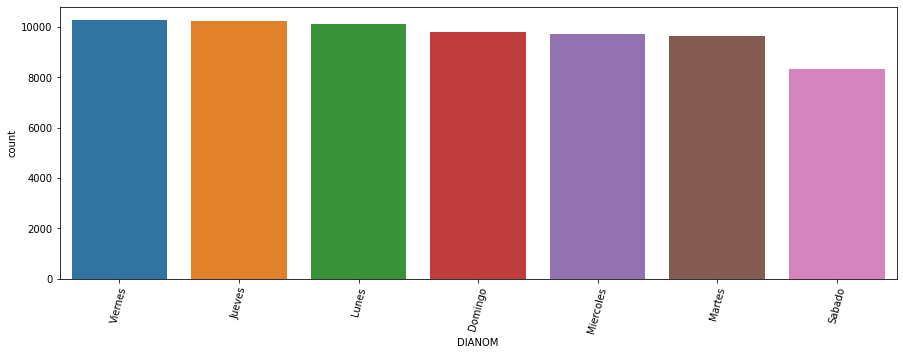

In [226]:
plt.figure(figsize=(15,5))
sns.countplot(x='DIANOM', data=df, order = df['DIANOM'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

In [227]:
df['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

#### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* **temporada_alta** : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* **dif_min** : diferencia en minutos entre Fecha-O y Fecha-I .
* **atraso_15** : 1 si dif_min > 15, 0 si no.
* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I

Para relaizar el paso de la variable **temporada_alta**, en el intervalo entre 15-Dic y 3-Mar se debe tener cuidado ya, se podría interpretar de la siguiente manera:
* 15 de Diciembre del 2017 al 3 Marzo del 2018, si se observa con anterioridad 2018 solo tiene 2 vuelos, por lo que se descarta
* Si se toma del 3 de Marzo del 2017 al 31 de Diciembre del 2017, se estaría incluyendo los intervalos de Julio y Septiembre y eso sumaría más datos al resultado (Este código comentado representado representa lo que se comenta en este punto )
* Dado a que es solo 2017, se establece los intervalos del 15 de Diciembre al 31 del 2017 y después del 1 de Enero al 3 de Marzo del 2017.

**Nota**:  Aun así, se debe platicar con el cliente para disipar dudas

In [228]:
df['temporada_alta'] = np.where((df['Fecha-I'] >= '2017-12-15') & (df['Fecha-I'] <= '2017-12-31') |
                                (df['Fecha-I'] >= '2017-01-01') & (df['Fecha-I'] <= '2017-03-03') |
                                (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31') |
                                (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30') , 1, 0)

In [229]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

In [230]:
#df['temporada_alta'] = np.where((df['Fecha-I'] >= '2017-03-03') & (df['Fecha-I'] <= '2017-12-31') |
#                                (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31') |
#                                (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30') , 1, 0)

In [231]:
#df['temporada_alta'].value_counts()

Para determinar la diferencia en minutos entre estas dos variables es necesario cambiarlas a variable **datatime**, antes de tratar de hacer la conversión, esto es debido a como se visualizo anteriormente en la información de las variables **Fecha-I** y **Fecha-O**, están como objeto

In [232]:
df['Fecha-I'] = df['Fecha-I'].astype('datetime64[ns]')
df['Fecha-O'] = df['Fecha-O'].astype('datetime64[ns]')
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])/ pd.Timedelta(minutes=1)

In [233]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

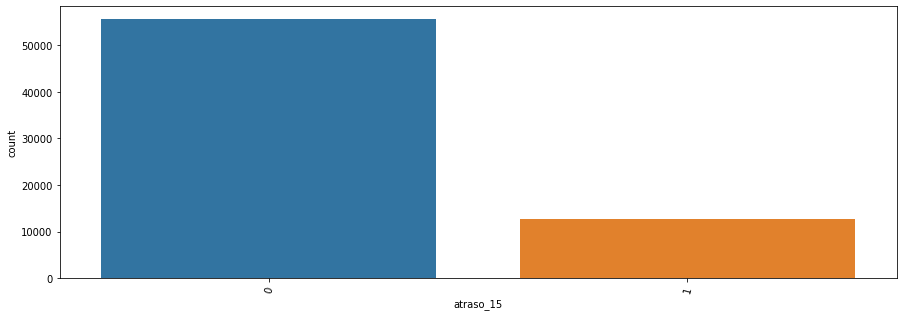

In [234]:
plt.figure(figsize=(15,5))
sns.countplot(x='atraso_15', data=df)
plt.xticks(rotation=75)
plt.show()

In [235]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [236]:
T1 = df.set_index('Fecha-I').between_time('05:00:00','11:59:00')
T1['periodo_dia'] = "mañana"


T2 = df.set_index('Fecha-I').between_time('12:00:00','18:59:00')
T2['periodo_dia'] = "tarde"

T3 = df.set_index('Fecha-I').between_time('19:00:00','04:59:00')
T3['periodo_dia'] = "noche"

In [237]:
df = pd.concat([T1,T2,T3], 0)


C:\Users\osval\AppData\Local\Temp\ipykernel_15140\1813720941.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([T1,T2,T3], 0)


Se verifica que se encuentren añadidas las variables **temporada_alta** , **dif_min**, **atraso_15** y **periodo_dia** esten  con sus correctos resultados

**Nota**:  La verificación se puede hacer  teminando en cada celda, aunque el script final no lo llevará

In [238]:
df

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
Fecha-I,,,,,,,,,,,,,,,,,,,,,
2017-01-01 10:35:00,1281,SCEL,SABE,ARG,2017-01-01 10:25:00,1281,SCEL,SABE,ARG,1,...,2017,Domingo,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-10.0,0,mañana
2017-01-02 10:35:00,1281,SCEL,SABE,ARG,2017-01-02 10:37:00,1281,SCEL,SABE,ARG,2,...,2017,Lunes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,2.0,0,mañana
2017-01-03 10:35:00,1281,SCEL,SABE,ARG,2017-01-03 10:33:00,1281,SCEL,SABE,ARG,3,...,2017,Martes,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,-2.0,0,mañana
2017-01-04 10:35:00,1281,SCEL,SABE,ARG,2017-01-04 11:06:00,1281,SCEL,SABE,ARG,4,...,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,31.0,1,mañana
2017-01-05 10:35:00,1281,SCEL,SABE,ARG,2017-01-05 10:53:00,1281,SCEL,SABE,ARG,5,...,2017,Jueves,I,Aerolineas Argentinas,Santiago,Buenos Aires,1,18.0,1,mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301.0,SCEL,SCCI,JAT,29,...,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,1,-5.0,0,noche
2017-12-18 20:11:00,305,SCEL,SCCI,JAT,2017-12-18 20:21:00,305.0,SCEL,SCCI,JAT,18,...,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,1,10.0,0,noche
2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305.0,SCEL,SCCI,JAT,23,...,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,1,-4.0,0,noche


In [239]:
df['periodo_dia'].value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

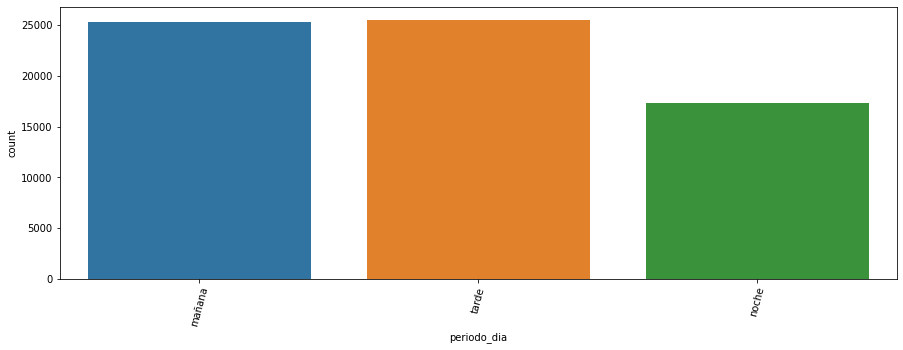

In [240]:
plt.figure(figsize=(15,5))
sns.countplot(x='periodo_dia', data=df)
plt.xticks(rotation=75)
plt.show()